<a href="https://colab.research.google.com/github/nmesosphere/Reality-Check/blob/main/model_Edited_4_6_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reality Check


An Instance Segementation model that detects instances of AI-generated features and/or manipulation in images of people (ie. deepfakes).

By: Mark-Anthony Delva,
    [Nmesoma Duru](https://github.com/nmesosphere), and
   [Micheal Johnson](https://github.com/SolaMike)

In [ ]:
!pip install ultralytics
!pip install keras
!pip install roboflow

# Import necessary modules

In [ ]:
from google.colab import userdata
k2 = userdata.get('api_key_Mi')

import os
import shutil
import ultralytics
from ultralytics import YOLO
from IPython import display
from IPython.display import display, Image
from roboflow import Roboflow

ultralytics.checks()

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


# Download the datasets

In [ ]:
rf2 = Roboflow(api_key = k2)

print(rf2.workspace())

# Data set is called fake images but is actually whole dataset used for this project

project2 = rf2.workspace("reality-check-lx25q").project("fake-images-4")
version2 = project2.version(1)
dataset2 = version2.download("yolov8")

loading Roboflow workspace...
{
  "name": "Reality Check",
  "url": "reality-check-lx25q",
  "projects": [
    "reality-check-lx25q/fake-images-2",
    "reality-check-lx25q/fake-images-3",
    "reality-check-lx25q/fake-images-4",
    "reality-check-lx25q/fake-images-afmyf"
  ]
}
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.44, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fake-Images-4-1 in yolov8:: 100%|██████████| 3752/3752 [00:00<00:00, 6608.32it/s]


Directory deletion code (in the case of mistakes in directory/file generation)

In [ ]:
## Use this line cautiously to completely delete a directory and all the files in it.

#shutil.rmtree('/content/runs')

# Train the model

In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt imgsz=640 data=/content/Fake-Images-4-1/data.yaml epochs=30 batch=16 name=yolov8n-seg exist_ok=True amp=False

100% 6.73M/6.73M [00:00<00:00, 87.8MB/s]
Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Fake-Images-4-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

Checking the result of the model's training

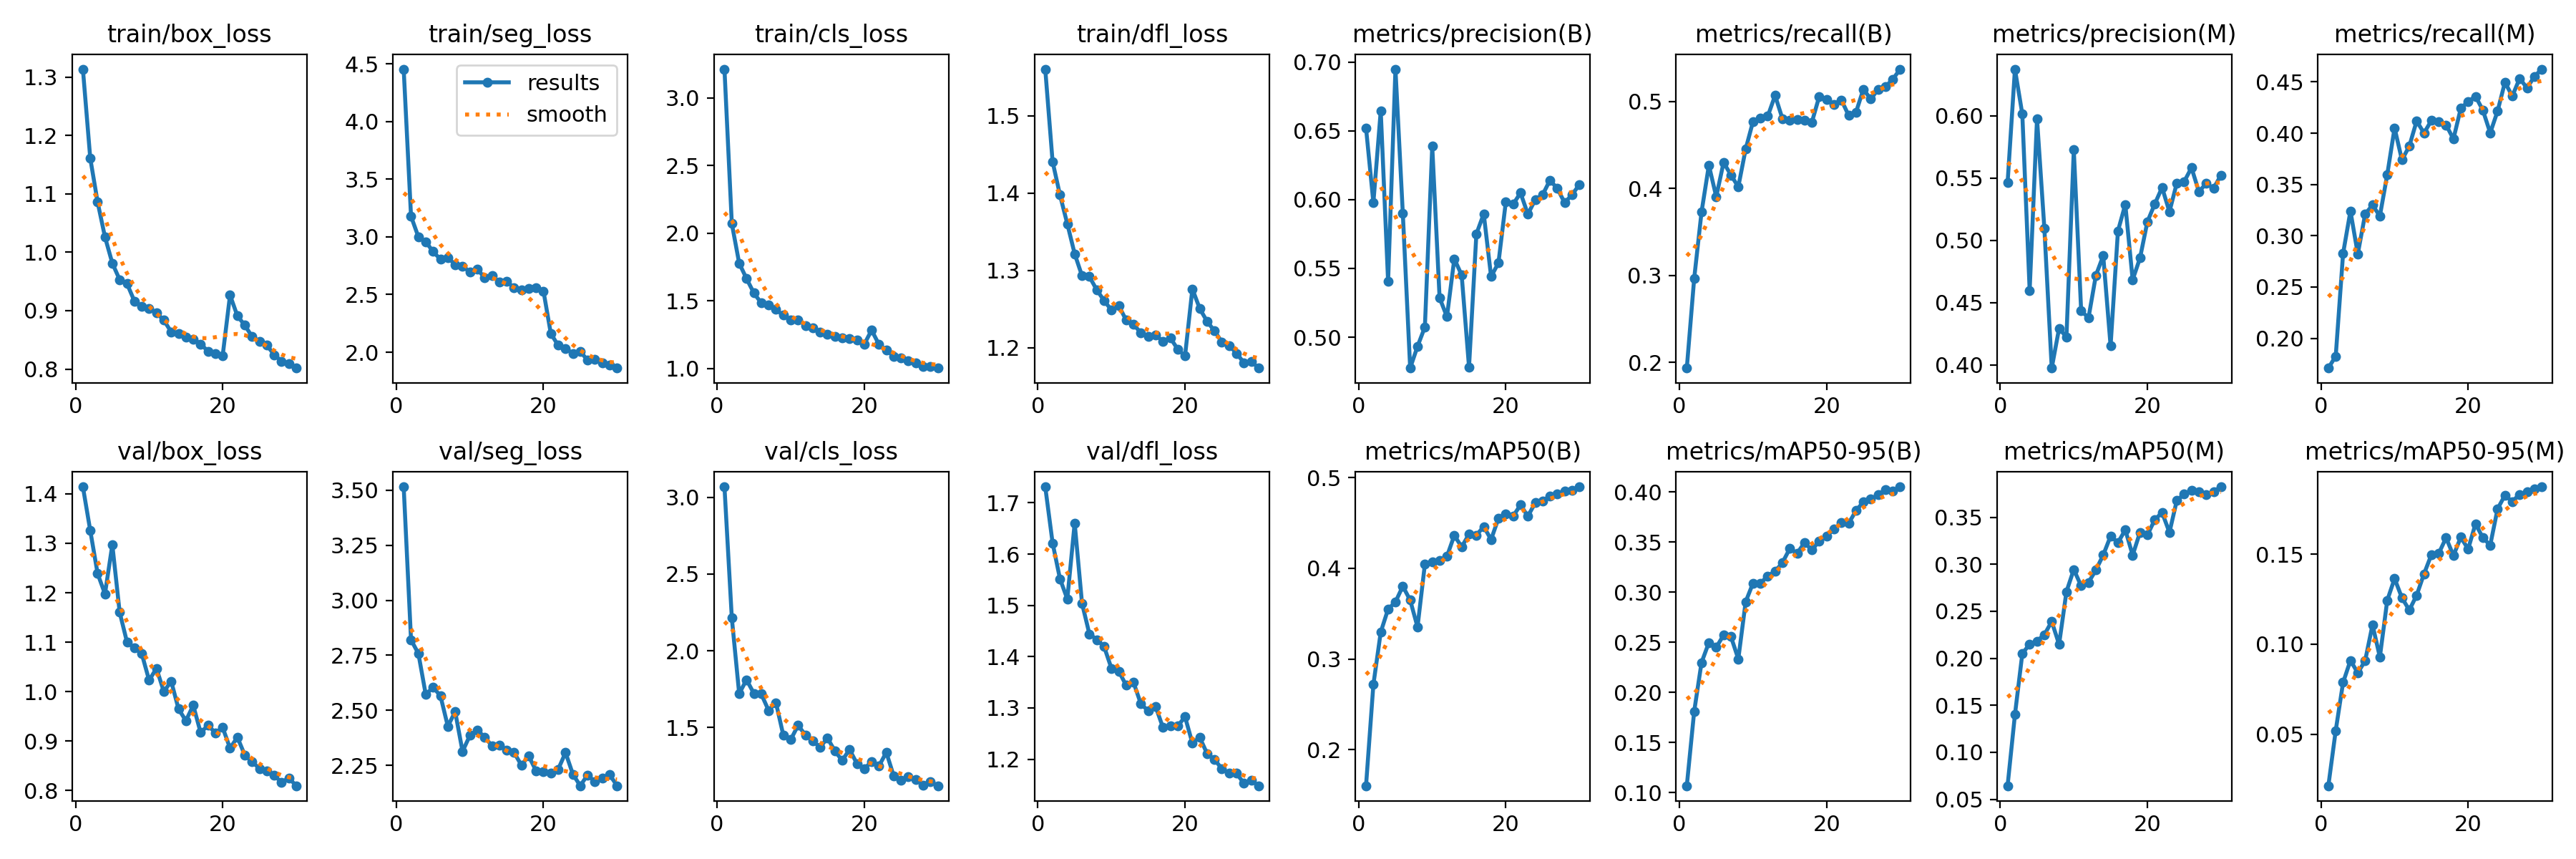

In [ ]:
Image(filename='/content/runs/segment/yolov8n-seg/results.png')

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/yolov8n-seg/weights/best.pt imgsz=640 data=/content/Fake-Images-4-1/data.yaml

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3260404 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Fake-Images-4-1/valid/labels.cache... 373 images, 0 backgrounds, 0 corrupt: 100% 373/373 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 24/24 [00:22<00:00,  1.05it/s]
                   all        373       2940      0.611      0.538       0.49      0.405      0.552      0.461      0.381      0.186
  Background anomalies        373         66      0.469      0.803      0.652      0.618      0.432      0.725      0.549      0.211
Facial inconsistencies        373        369      0.716      0.943       0.87      0.722      0.641       0.84      0.759      0.499
      Generic features        373          1          1          0    0.00569    0.00398          1          0    0.00569    0.00

Testing data

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/yolov8n-seg/weights/best.pt imgsz=640 source=/content/Fake-Images-4-1/test/images

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3260404 parameters, 0 gradients, 12.0 GFLOPs

image 1/187 /content/Fake-Images-4-1/test/images/fake_812_jpg.rf.27586371a989d37b23a44002f8fb2bf4.jpg: 640x640 3 Facial inconsistenciess, 1 Lack of eye reflections, 2 human proportionss, 15.4ms
image 2/187 /content/Fake-Images-4-1/test/images/fake_815_jpg.rf.71a95f011d7871e2c4ae4f676d94060a.jpg: 640x640 1 Facial inconsistencies, 1 human proportions, 9.4ms
image 3/187 /content/Fake-Images-4-1/test/images/fake_819_jpg.rf.f4b0ef877b2081a74fc4641667bac6a1.jpg: 640x640 3 Facial inconsistenciess, 1 Lack of eye reflections, 9.3ms
image 4/187 /content/Fake-Images-4-1/test/images/fake_821_jpg.rf.7f839c3d76b1d533e1b091a9424ac601.jpg: 640x640 3 Facial inconsistenciess, 1 Lack of eye reflections, 1 Unnatural artifacts, 1 person, 9.3ms
image 5/187 /content/Fake-Images-4-1/test/images/fake_823_jpg.rf.7bf2798c76c7929c5e985ffcfbe6

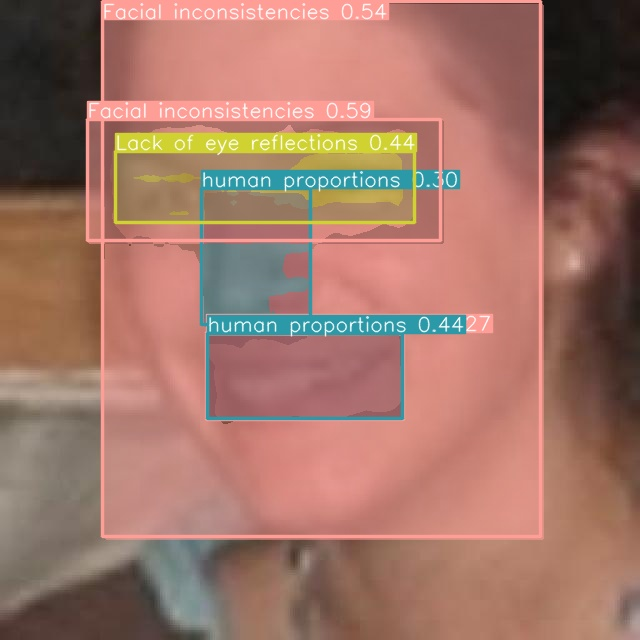

In [ ]:
Image(filename='/content/runs/segment/predict/fake_812_jpg.rf.27586371a989d37b23a44002f8fb2bf4.jpg')

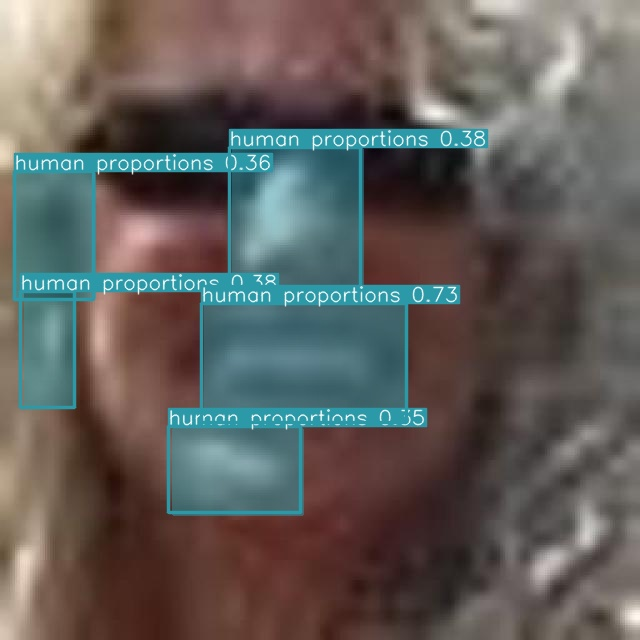

In [ ]:
Image(filename='/content/runs/segment/predict/real_28_jpg.rf.189d82a85544a6e4d143c781b925476c.jpg')

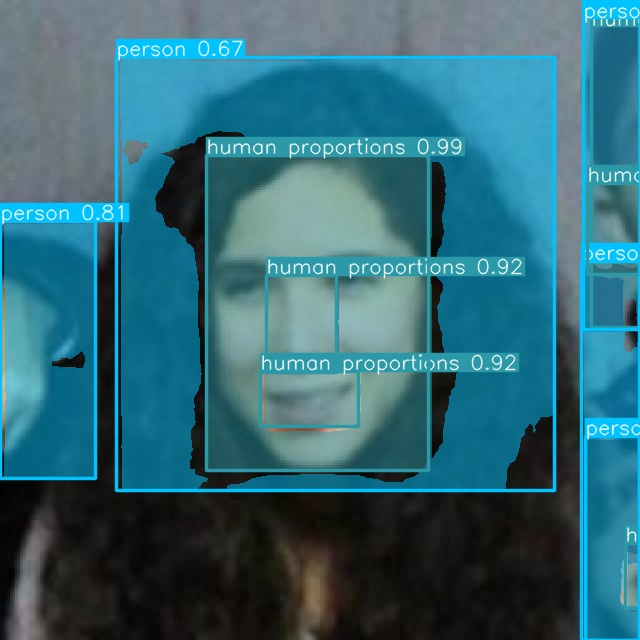

In [ ]:
Image(filename='/content/runs/segment/predict/real_57_jpg.rf.b48def24baf7b2f3177bd7b2b8384002.jpg')

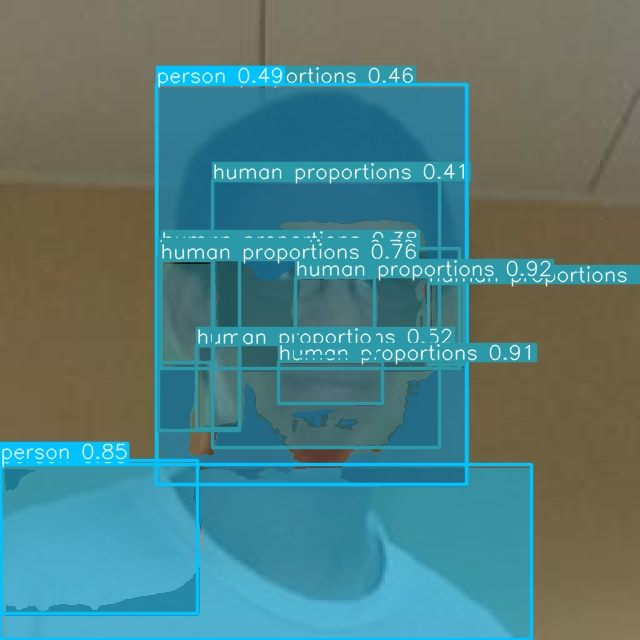

In [ ]:
Image(filename='/content/runs/segment/predict/real_817_jpg.rf.9c814e732960a48d3d01c3b0cafb8146.jpg')

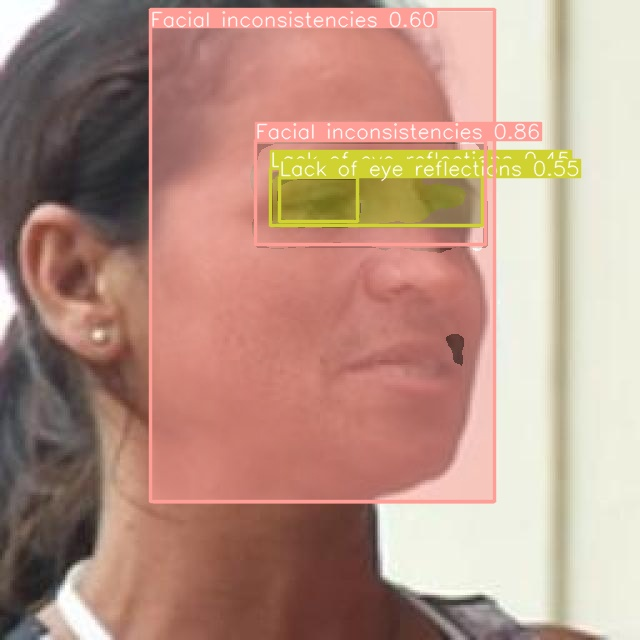

In [ ]:
Image(filename='/content/runs/segment/predict/fake_879_jpg.rf.f27b1e29d761a13463148eeae1ebc84d.jpg')

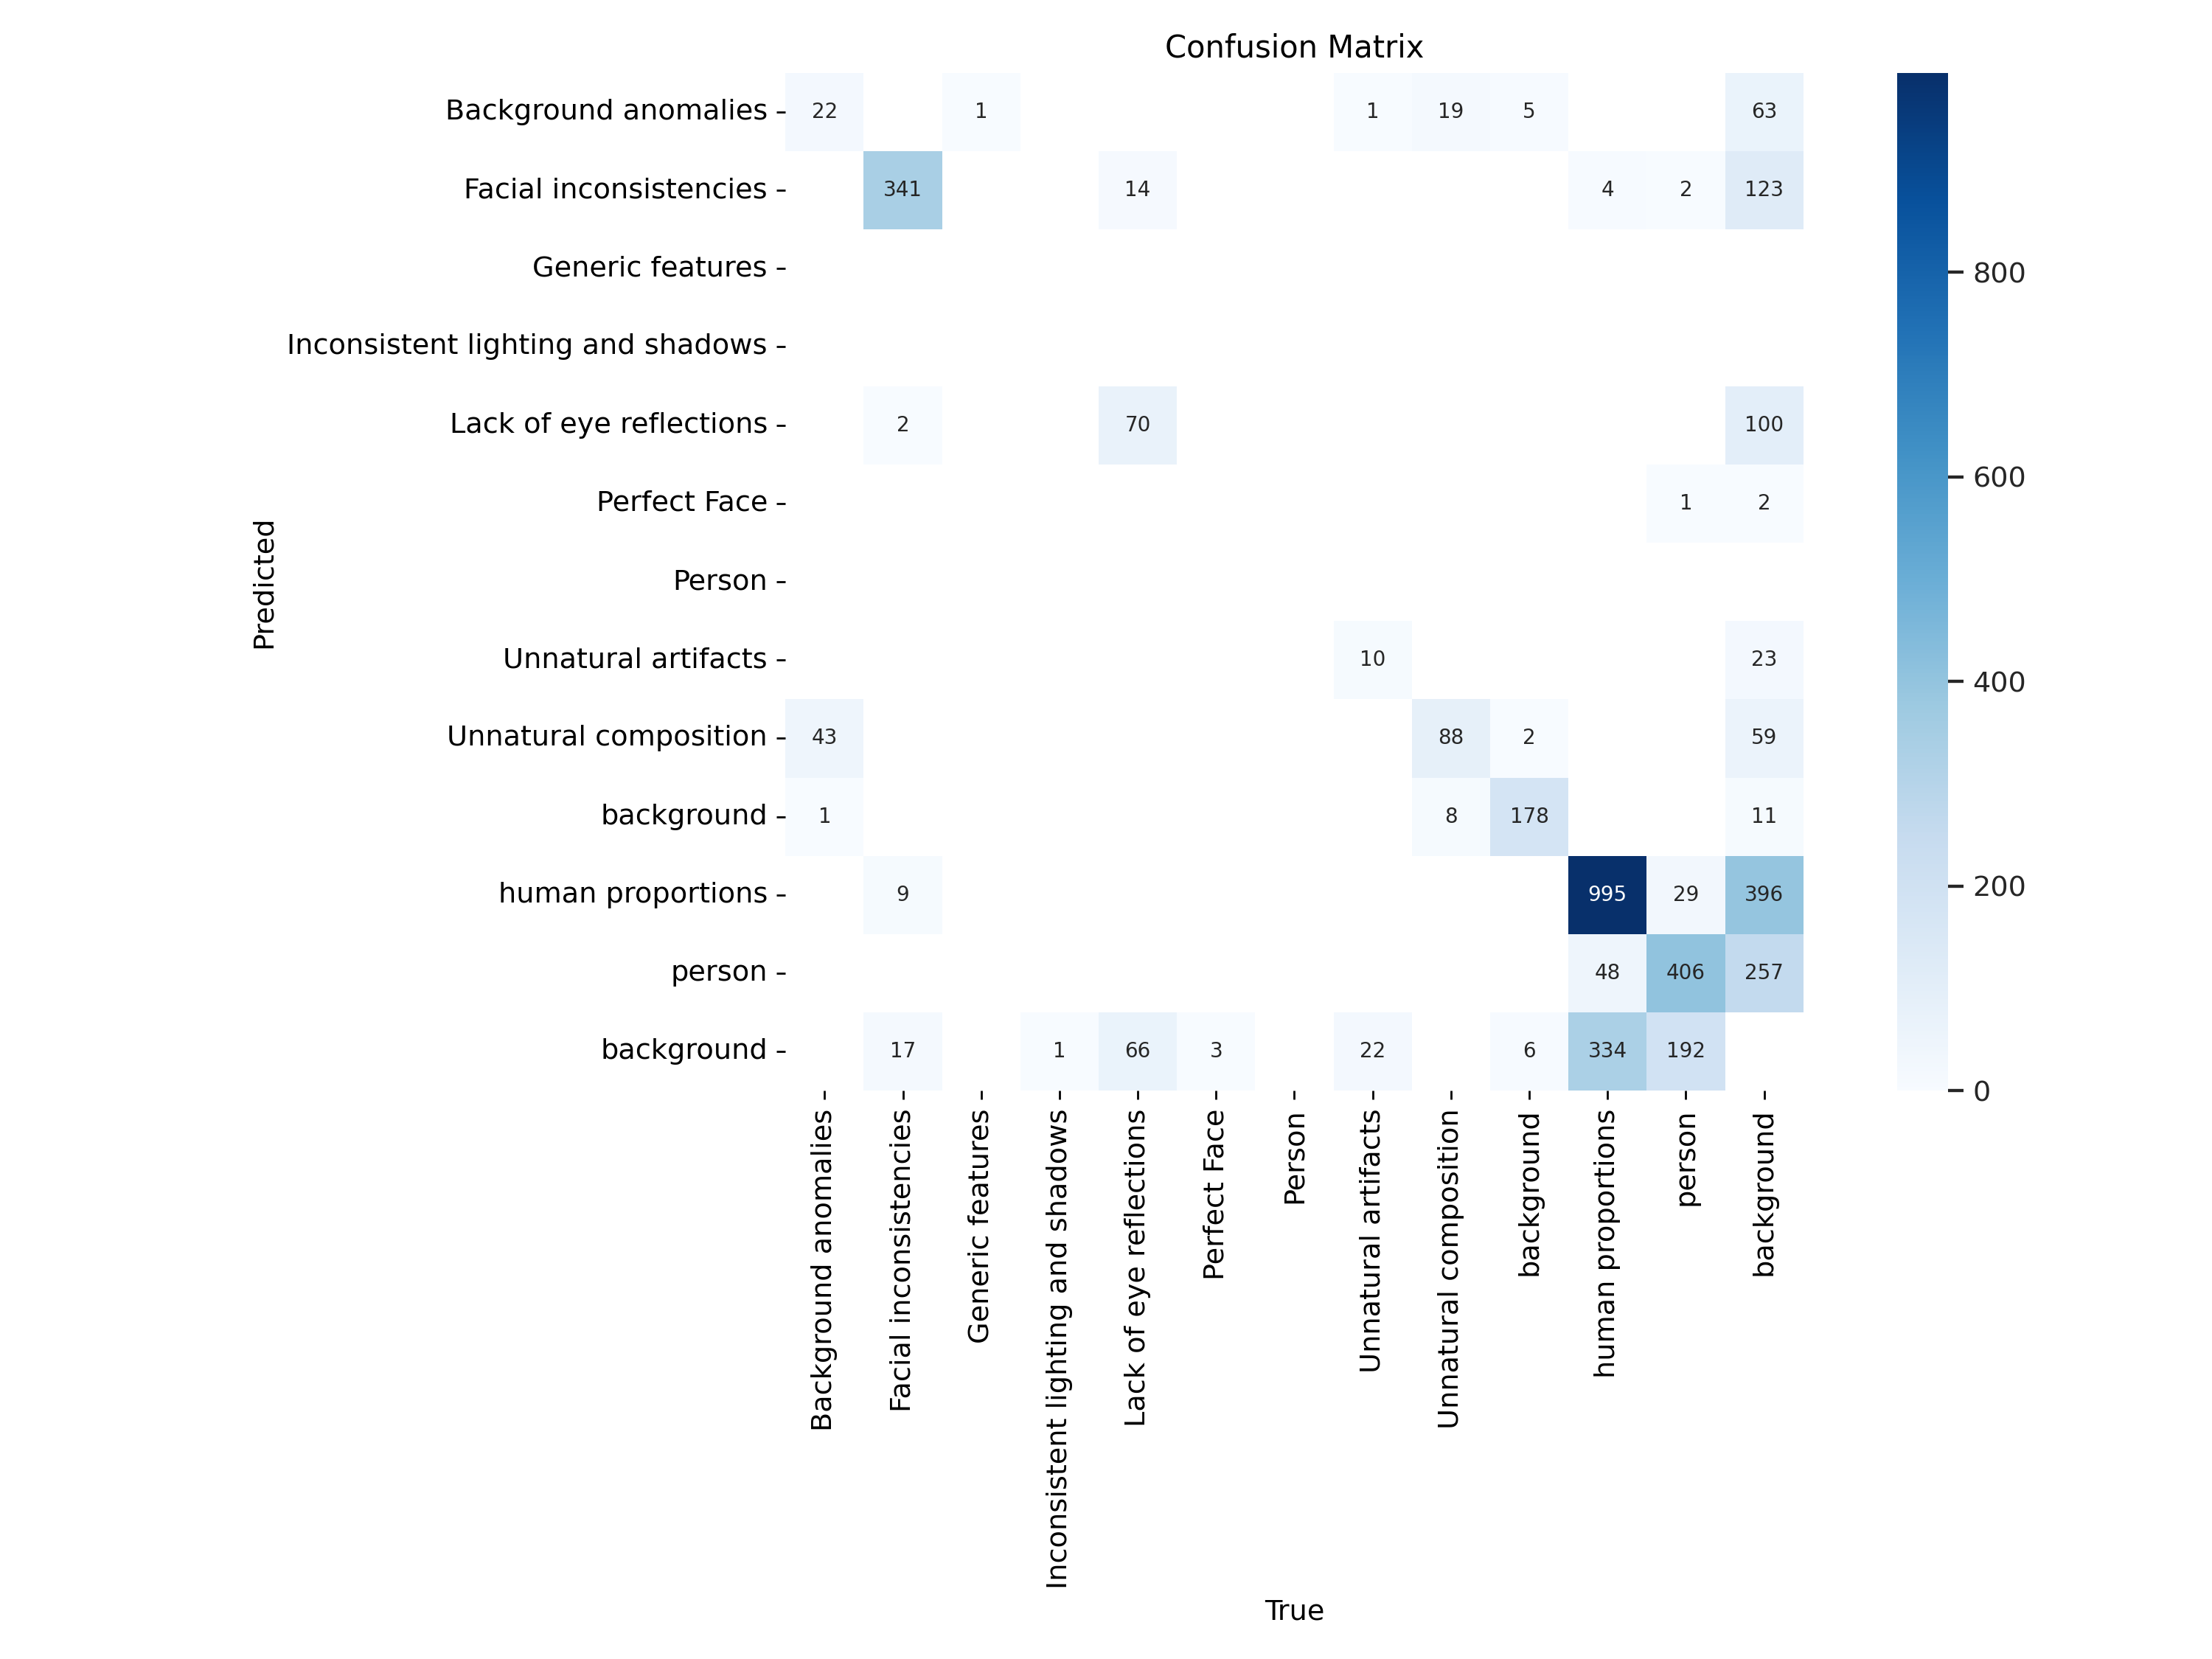

In [ ]:
Image(filename='/content/runs/segment/yolov8n-seg/confusion_matrix.png')